<a href="https://colab.research.google.com/github/carlos-argueta/rse_prob_robotics/blob/main/rse_perception_experiments/notebooks/Simple_Robotics_Perception_Experiment_3_3_D_Object_Detection_in_Point_Clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Install required packages

In [ ]:
!pip install ipython-autotime
%load_ext autotime

!pip install open3d
!pip install pythreejs
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Unin

## Clone and install other packages

In [ ]:
!git clone https://github.com/ibaiGorordo/ONNX-HITNET-Stereo-Depth-estimation.git

%cd ONNX-HITNET-Stereo-Depth-estimation
!pwd
!pip install -r requirements.txt

%cd ..
!pwd

!curl "https://s3.ap-northeast-2.wasabisys.com/pinto-model-zoo/142_HITNET/resources.tar.gz" -o resources.tar.gz
!mv resources.tar.gz ONNX-HITNET-Stereo-Depth-estimation/models/resources.tar.gz
!tar -zxvf ONNX-HITNET-Stereo-Depth-estimation/models/resources.tar.gz -C ONNX-HITNET-Stereo-Depth-estimation/models
!rm ONNX-HITNET-Stereo-Depth-estimation/models/resources.tar.gz
!echo Download finished.

Cloning into 'ONNX-HITNET-Stereo-Depth-estimation'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 56 (delta 24), reused 45 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 8.20 MiB | 6.19 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/ONNX-HITNET-Stereo-Depth-estimation
/content/ONNX-HITNET-Stereo-Depth-estimation
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for imread-from-url: filename=imread_from_url-0.1.3-py3-none-any.whl size=6613 sha256=a7ae38e2970

## Get the fine-tuned Yolo model

In [ ]:
!wget -O best_x.pt "https://www.dropbox.com/scl/fi/t67l9asn4h3w3tbqu6l9q/best_x.pt?rlkey=0hthcivqkf8xxkyywwxoya5q1&st=foqfcdfv&dl=0"

--2025-04-09 10:54:32--  https://www.dropbox.com/scl/fi/t67l9asn4h3w3tbqu6l9q/best_x.pt?rlkey=0hthcivqkf8xxkyywwxoya5q1&st=foqfcdfv&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1b61584cda1caa3708436e1467.dl.dropboxusercontent.com/cd/0/inline/CncmLMFCWC4l-fYIZ0BzLoiGYclC-pYEVll8qNhfZH0t2_5jSiPynaShK2omI5oTcZLVayIgkMuErdSFQP6Vn1M9vEp6V5IBsWrOp2_-9TKy7I_U7bxYaPJnoUauBiegLGY/file# [following]
--2025-04-09 10:54:32--  https://uc1b61584cda1caa3708436e1467.dl.dropboxusercontent.com/cd/0/inline/CncmLMFCWC4l-fYIZ0BzLoiGYclC-pYEVll8qNhfZH0t2_5jSiPynaShK2omI5oTcZLVayIgkMuErdSFQP6Vn1M9vEp6V5IBsWrOp2_-9TKy7I_U7bxYaPJnoUauBiegLGY/file
Resolving uc1b61584cda1caa3708436e1467.dl.dropboxusercontent.com (uc1b61584cda1caa3708436e1467.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6022:15::a27d:420f
Connec

## Get the data

In [ ]:
!wget https://www.dropbox.com/scl/fi/2n3vg5vyz37ca7tobctn5/robot_almost_back_closer_180.zip?rlkey=r5taos4eze5gdawfenz4atoo5&st=5olsho6v&dl=0
!mv robot_almost_back_closer_180.zip?rlkey=r5taos4eze5gdawfenz4atoo5 robot_almost_back_closer_180.zip
!unzip robot_almost_back_closer_180.zip

--2025-04-09 10:54:36--  https://www.dropbox.com/scl/fi/2n3vg5vyz37ca7tobctn5/robot_almost_back_closer_180.zip?rlkey=r5taos4eze5gdawfenz4atoo5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd236165b9e62d90436cd1268ec.dl.dropboxusercontent.com/cd/0/inline/CncmiDyHtOD9dnYhOCZo_ECnmjFQwZn7hysG7XTLBuDN_TxEakbFxBzxr4tHTwhJS065mUGWEEeJVA-i7vLG2dP0231D_Gx_68h8hh3Gvgjg3Qs3-PoXnaH4sOEOSnIKMusRVQ4wfkqt_9wROtplHkaZ/file# [following]
--2025-04-09 10:54:36--  https://ucd236165b9e62d90436cd1268ec.dl.dropboxusercontent.com/cd/0/inline/CncmiDyHtOD9dnYhOCZo_ECnmjFQwZn7hysG7XTLBuDN_TxEakbFxBzxr4tHTwhJS065mUGWEEeJVA-i7vLG2dP0231D_Gx_68h8hh3Gvgjg3Qs3-PoXnaH4sOEOSnIKMusRVQ4wfkqt_9wROtplHkaZ/file
Resolving ucd236165b9e62d90436cd1268ec.dl.dropboxusercontent.com (ucd236165b9e62d90436cd1268ec.dl.dropboxusercontent.com)...

# Imports

In [ ]:
from ultralytics import YOLO
import cv2

import numpy as np
import open3d as o3d
import pythreejs as p3js
import matplotlib.pyplot as plt

from google.colab import output
output.enable_custom_widget_manager()

# Change to the cloned repository directory
import sys
sys.path.append('/content/ONNX-HITNET-Stereo-Depth-estimation')

from hitnet import HitNet, ModelType, CameraConfig

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
time: 17.6 s (started: 2025-04-09 10:54:50 +00:00)


# Helper Functions

In [ ]:
def get_extents(vertices):
    extents = np.zeros((3, 2))
    extents[:, 0] = np.min(vertices, axis=0)
    extents[:, 1] = np.max(vertices, axis=0)

    return extents

def create_box_lines(bbox):
    # Create a LineSet directly from the oriented bounding box
    lineset = o3d.geometry.LineSet.create_from_oriented_bounding_box(bbox)
    # Extract the corner points and line indices from the LineSet
    box_points = np.asarray(lineset.points)
    line_indices = np.asarray(lineset.lines)

    # Build an array of line segments (each segment is defined by two consecutive points)
    lines = []
    for idx_pair in line_indices:
        start_idx, end_idx = idx_pair
        lines.append(box_points[start_idx])
        lines.append(box_points[end_idx])

    return np.array(lines)


time: 749 µs (started: 2025-04-09 10:55:08 +00:00)


# Calibration Data

In [ ]:
# Intrinsic parameters for the left camera
K_left = np.array([[1069.81458, 0, 958.335899],
                   [0, 1070.93348, 532.561014],
                   [0, 0, 1]])

# Distortion parameters for the left camera
d_left = np.array([[-0.0928617372, 0.109980569, -0.000346829405, -0.0000429386182, -0.0556483182]])

# Intrinsic parameters for the right camera
K_right = np.array([[1065.60169, 0, 987.157859],
                    [0, 1066.49844, 550.644694],
                    [0, 0, 1]])

# Distortion parameters for the right camera
d_right = np.array([[-0.09864454, 0.12729628, 0.00069083, 0.00029051, -0.07082324]])

# Rotation matrix from left to right camera
R = np.array([[0.999999222, 0.00074783626, -0.00099847516],
              [-0.00075057129, 0.99999596, -0.00274164784],
              [0.000996420822, 0.00274239513, 0.999995743]])

# Translation vector from left to right camera
T = np.array([[-0.117422761],
              [0.0000991546881],
              [-0.000706964913]])

# Essential matrix
E = np.array([[-4.31827770e-07, 7.07233978e-04, 9.72160172e-05],
              [-5.89961879e-04, 3.21490914e-04, 1.17422967e-01],
              [-1.10204579e-05, -1.17422361e-01, 3.22030862e-04]])

# Fundamental matrix
F = np.array([[2.03962390e-10, -3.33694199e-07, 1.28393946e-04],
              [2.78418540e-07, -1.51561509e-07, -5.94698660e-02],
              [-1.47964343e-04, 5.94508125e-02, 1.00000000e+00]])


# Rectify the stereo cameras
frameSize = (1920, 1080) # Assuming both images have the same size

R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(
	K_left, d_left, K_right, d_right,
	frameSize, R, T, flags=cv2.CALIB_ZERO_DISPARITY, alpha=-1
)

# Print confirmation
print("Calibration data loaded successfully.")

Calibration data loaded successfully.
time: 29.6 ms (started: 2025-04-09 10:55:08 +00:00)


# Load the Models

In [ ]:
# Load a pretrained YOLOv8n model
model = YOLO('best_x.pt')

print("YOLO model loaded")

# Select model type
model_type = ModelType.middlebury
# model_type = ModelType.flyingthings
# model_type = ModelType.eth3d

if model_type == ModelType.middlebury:
	model_path = "ONNX-HITNET-Stereo-Depth-estimation/models/middlebury_d400/saved_model_480x640/model_float32.onnx"
elif model_type == ModelType.flyingthings:
	model_path = "ONNX-HITNET-Stereo-Depth-estimation/models/flyingthings_finalpass_xl/saved_model_480x640/model_float32.onnx"
elif model_type == ModelType.eth3d:
	model_path = "ONNX-HITNET-Stereo-Depth-estimation/models/eth3d/saved_model_480x640/model_float32.onnx"

print(model_path)

# Initialize model
depth_estimator = HitNet(model_path, model_type)

print("HitNet model loaded")

YOLO model loaded
ONNX-HITNET-Stereo-Depth-estimation/models/middlebury_d400/saved_model_480x640/model_float32.onnx


/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


HitNet model loaded
time: 1.27 s (started: 2025-04-09 10:55:08 +00:00)


# 2D to 3D Object Detection

In [ ]:
# Load the stereo images (make sure this matches your image loading step)
left_image = cv2.imread('robot_almost_back_closer_180/left/left_34.png')
right_image = cv2.imread('robot_almost_back_closer_180/right/right_34.png')

time: 137 ms (started: 2025-04-09 10:55:09 +00:00)


## 2D Object Detection


0: 384x640 1 SHL-1, 114.4ms
Speed: 15.1ms preprocess, 114.4ms inference, 381.7ms postprocess per image at shape (1, 3, 384, 640)


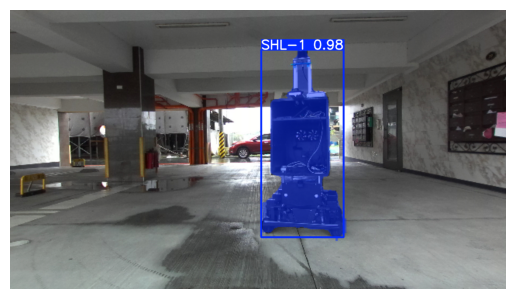

time: 5.37 s (started: 2025-04-09 10:55:09 +00:00)


In [ ]:
pred = model(left_image)

annotated = pred[0].plot()

# Convert BGR to RGB for matplotlib
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(annotated_rgb)
plt.axis('off')  # Hide axes
plt.show()

## Depth Estimation

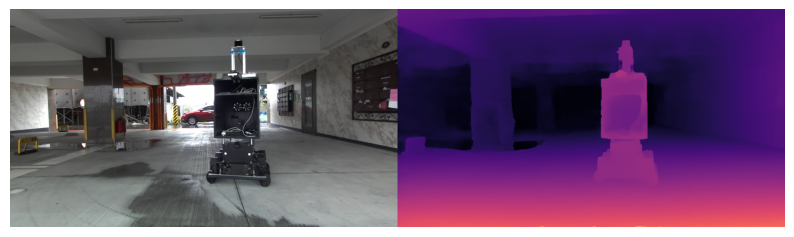

time: 7.61 s (started: 2025-04-09 10:55:14 +00:00)


In [ ]:
# Estimate the depth
disparity_map = depth_estimator(left_image, right_image)

color_disparity = depth_estimator.draw_disparity()
combined_image = np.hstack((left_image, color_disparity))

# Display the combined image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

## 2D to 3D Object Detection

In [ ]:
# Resize left_image to match the disparity map resolution
left_image_resized = cv2.resize(left_image, (disparity_map.shape[1], disparity_map.shape[0]), interpolation=cv2.INTER_AREA)
left_image_resized = cv2.cvtColor(left_image_resized, cv2.COLOR_BGR2RGB)

points_3D = cv2.reprojectImageTo3D(disparity_map, Q)

# Mask out points with zero disparity (infinite depth)
# Create a valid mask from the disparity map (shape: height x width)
valid_mask = disparity_map > disparity_map.min()

# Extract valid 3D points and corresponding colors
output_points = points_3D[valid_mask]
output_colors = left_image_resized[valid_mask]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(output_points)
pcd.colors = o3d.utility.Vector3dVector(output_colors.astype(float) / 255.0)

# Create a list to hold extra geometries (like bounding boxes)
geometries = []

# Compute scaling factors between original image and disparity map
scale_x = disparity_map.shape[1] / left_image.shape[1]  # width scaling
scale_y = disparity_map.shape[0] / left_image.shape[0]  # height scaling

for detection in pred[0].boxes.data.cpu().numpy():
	x1, y1, x2, y2, conf, cls = detection
	# Convert the detection coordinates to integers (if not already)
	x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

	# Scale the coordinates to match the disparity map resolution
	x1_scaled = int(x1 * scale_x)
	y1_scaled = int(y1 * scale_y)
	x2_scaled = int(x2 * scale_x)
	y2_scaled = int(y2 * scale_y)

	# Create a 2D mask for the detection area on the disparity map
	mask_det = np.zeros(disparity_map.shape, dtype=bool)
	mask_det[y1_scaled:y2_scaled, x1_scaled:x2_scaled] = True

	# Combine with the valid disparity mask
	combined_mask = valid_mask & mask_det
	points_det = points_3D[combined_mask]

	if points_det.size == 0:
		continue

	# Compute the median depth (Z value)
	median_z = np.median(points_det[:, 2])
	# Filter out points that are too far from the median depth (e.g. > 0.5 meter difference)
	inlier_mask = np.abs(points_det[:, 2] - median_z) < 0.5
	points_det = points_det[inlier_mask]

	obb = o3d.geometry.OrientedBoundingBox.create_from_points(o3d.utility.Vector3dVector(points_det))
	obb.color = (0, 1, 0)  # for example, green

	geometries.append(obb)

# Visualize both the point cloud and the bounding boxes
geometries.append(pcd)  # or pcd, based on your preference


# Create a list to hold the p3js objects for the boxes
box_objects = []

boxes = [geom for geom in geometries if isinstance(geom, o3d.geometry.OrientedBoundingBox)]

# For each bounding box, create a p3js line object
for bbox in boxes:
    # Create a NumPy array of line segments from the bounding box
    lines_np = create_box_lines(bbox)

    # Create a p3js BufferGeometry from these lines
    box_geometry = p3js.BufferGeometry(
        attributes={
            'position': p3js.BufferAttribute(lines_np, normalized=False)
        }
    )

    # Create a line material (you can change the color as needed)
    line_material = p3js.LineBasicMaterial(color='green', linewidth=500)

    # Create the LineSegments object
    box_line = p3js.LineSegments(geometry=box_geometry, material=line_material)

    # Append the created box line to our list of objects to add to the scene
    box_objects.append(box_line)


# Convert the Open3D Vector3dVector to a NumPy array
points = np.asarray(pcd.points)

n_vert = points.shape[0]
center = points.mean(axis=0)
extents = get_extents(points)

max_delta = np.max(extents[:, 1] - extents[:, 0])
camPos = [center[i] + 4 * max_delta for i in range(3)]
light_pos = [center[i] + (i+3)*max_delta for i in range(3)]

# Set up a scene and render it:
# camera = p3js.PerspectiveCamera(position=camPos, fov=20,)
# camera.up = (0,0,1)

# Create a Three.js point cloud object
geometry = p3js.BufferGeometry(
    attributes={
        'position': p3js.BufferAttribute(pcd.points, normalized=False),
        'color': p3js.BufferAttribute(pcd.colors, normalized=True)
    }
)

material = p3js.PointsMaterial(vertexColors='VertexColors', size=0.03)
points_cloud = p3js.Points(geometry=geometry, material=material)

# Set up the scene and camera
camera = p3js.PerspectiveCamera(position=[0, -20, 0], fov=75)
camera.up = (0,0,1)

# Start with the point cloud, camera, and ambient light
scene_children = [points_cloud, camera, p3js.AmbientLight()]

# Now add the bounding box line objects to the scene
scene_children.extend(box_objects)

scene = p3js.Scene(children=scene_children)
# scene = p3js.Scene(children=[points_cloud, camera, p3js.AmbientLight()])
controller = p3js.OrbitControls(controlling=camera)

# Set up the renderer
renderer = p3js.Renderer(camera=camera, scene=scene, controls=[controller], width=840, height=680)

# Display the point cloud
display(renderer)

Renderer(camera=PerspectiveCamera(fov=75.0, position=(0.0, -20.0, 0.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, …

time: 302 ms (started: 2025-04-09 10:59:38 +00:00)


time: 338 ms (started: 2025-04-09 10:55:22 +00:00)
